# OTO Capital Assignment Notebook

## Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# display settings for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

----

---

## Import data

In [2]:
# Imprting data using pandas read json
raw_df = pd.read_json("sensor_data.json", lines=True, orient='values', typ='frame')

In [3]:
raw_df

,acc,gyr,locations,mag,orientationAngles,ts,value1,value2
0,"{'acc': 3, 'val': [-1.8379072, 5.630812, 8.084...","{'acc': 0, 'val': []}",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583298716729,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-1.8379072, 5.630812, 8.084..."
1,"{'acc': 3, 'val': [-1.7995796, 5.626021, 8.050...","{'acc': 0, 'val': []}",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583298716772,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-1.7995796, 5.626021, 8.050..."
2,"{'acc': 3, 'val': [-1.7899976999999998, 5.6116...","{'acc': 0, 'val': []}",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583298716790,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-1.7899976999999998, 5.6116..."
3,"{'acc': 3, 'val': [-1.7612519, 5.6164393, 7.99...","{'acc': 0, 'val': []}",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583298716820,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-1.7612519, 5.6164393, 7.99..."
4,"{'acc': 3, 'val': [-1.5744045999999998, 5.5158...","{'acc': 0, 'val': []}",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583298716840,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-1.5744045999999998, 5.5158..."
...,...,...,...,...,...,...,...,...
17553,"{'acc': 3, 'val': [-5.6179724, 7.4897037, 9.43...","{'acc': 3, 'val': [-0.6246636999999999, -0.677...",[],"{'acc': 2, 'val': [-42.15477, -8.99263, -15.85...","[1.8333184, -0.5987557, 0.5372753]",1583300546327,"{'acc': 0, 'val': [0.0, 0.0, 0.35000002]}","{'acc': 0, 'val': [5.635123, 8.481034, 8.538536]}"
17554,"{'acc': 3, 'val': [-5.426334, 6.6273313, 11.29...","{'acc': 3, 'val': [-0.9953753999999999, -0.980...",[],"{'acc': 2, 'val': [-42.555717, -5.3520355, -17...","[1.6979096, -0.48651305, 0.44789332]",1583300546337,"{'acc': 0, 'val': [0.0, 0.0, 0.44000006]}","{'acc': 0, 'val': [3.419809, 9.424681, 10.0201..."
17555,"{'acc': 3, 'val': [-4.779555, 4.4522367, 12.10...","{'acc': 3, 'val': [-0.64064264, -0.65378565, 0...",[],"{'acc': 2, 'val': [-42.653687, -6.615814, -14....","[1.7211596999999998, -0.32964787, 0.37608743]",1583300546347,"{'acc': 0, 'val': [0.0, 0.0, 0.399999980000000...","{'acc': 0, 'val': [2.455543, 8.620443999999999..."
17556,"{'acc': 3, 'val': [-4.769973, 4.2462254, 11.92...","{'acc': 3, 'val': [-0.5192026, -0.5525856, 0.7...",[],"{'acc': 0, 'val': []}","[0.0, 0.0, 0.0]",1583300546357,"{'acc': 0, 'val': []}","{'acc': 0, 'val': [-4.769973, 4.2462254, 11.92..."


### Acceleration

In [4]:
# Lambda function to extract list
raw_df['Acceleration_Extract'] = raw_df['acc'].apply(lambda x: x['val'])

# Split each X,Y and Z from the list and saving columns to final dataframe
final_df = pd.DataFrame(raw_df['Acceleration_Extract'].tolist(), 
                        columns=['x_axis_acceleration','y_axis_acceleration','z_axis_acceleration'],
                        index= raw_df.index)

### Location

In [5]:
raw_df['Locations_Extract'] = pd.DataFrame(raw_df['locations'].to_list())[0]

#### Latitude

In [6]:
# add latitude in final_df
final_df['lat'] = raw_df['Locations_Extract'].apply(lambda x : x['lt'] if x != None else x)

#### Longitude

In [7]:
# add longitude in final_df
final_df['long'] = raw_df['Locations_Extract'].apply(lambda x : x['lg'] if x != None else x)

#### Speed

In [8]:
# add speed in final_df
final_df['speed'] = raw_df['Locations_Extract'].apply(lambda x : x['speed'] if x != None else x)

# changing dtype to float
final_df['speed'] = final_df['speed'].astype(float)

### TimeStamp

In [9]:
# adding date-time to final_df
final_df['timeStamp'] = pd.to_datetime(raw_df['ts'], unit='ms')

---

### Interpolate and BackFill Missing Values
using default linear interpolation for now and backfill for remaining rows in beginning

In [10]:
# Interpolate missing values in all columns
for col in final_df.columns.to_list():
    print(col)
    # interpolate the missing values
    final_df[col] = final_df[col].interpolate()
    
    # backfill on remaining NA values
    final_df[col] = final_df[col].fillna(method="bfill")

x_axis_acceleration
y_axis_acceleration
z_axis_acceleration
lat
long
speed
timeStamp


In [11]:
final_df

,x_axis_acceleration,y_axis_acceleration,z_axis_acceleration,lat,long,speed,timeStamp
0,-1.837907,5.630812,8.084110,12.979606,77.601591,0.052741,2020-03-04 05:11:56.729
1,-1.799580,5.626021,8.050573,12.979606,77.601591,0.052741,2020-03-04 05:11:56.772
2,-1.789998,5.611648,8.021828,12.979606,77.601591,0.052741,2020-03-04 05:11:56.790
3,-1.761252,5.616439,7.993082,12.979606,77.601591,0.052741,2020-03-04 05:11:56.820
4,-1.574405,5.515829,7.887681,12.979606,77.601591,0.052741,2020-03-04 05:11:56.840
...,...,...,...,...,...,...,...
17553,-5.617972,7.489704,9.430369,12.917346,77.627528,1.013462,2020-03-04 05:42:26.327
17554,-5.426334,6.627331,11.294051,12.917346,77.627528,1.013462,2020-03-04 05:42:26.337
17555,-4.779555,4.452237,12.103723,12.917346,77.627528,1.013462,2020-03-04 05:42:26.347
17556,-4.769973,4.246225,11.921667,12.917346,77.627528,1.013462,2020-03-04 05:42:26.357


In [12]:
(final_df['timeStamp'].max() - final_df['timeStamp'].min())
# 30 mins of data

Timedelta('0 days 00:30:29.645000')

----

# Solution Approach 

**Assuming mobile will be in Horizontal position when user is riding a bike/scooter**

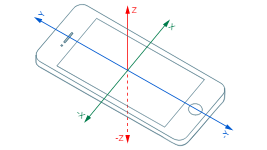

----

In [13]:
sns.set(style="whitegrid")

Box plots for acceleration

In [14]:
final_df['z_axis_acceleration'].describe()

count    17558.000000
mean        -7.141828
std          3.523429
min        -52.578987
25%         -8.783652
50%         -7.045732
75%         -6.949914
max         17.666023
Name: z_axis_acceleration, dtype: float64

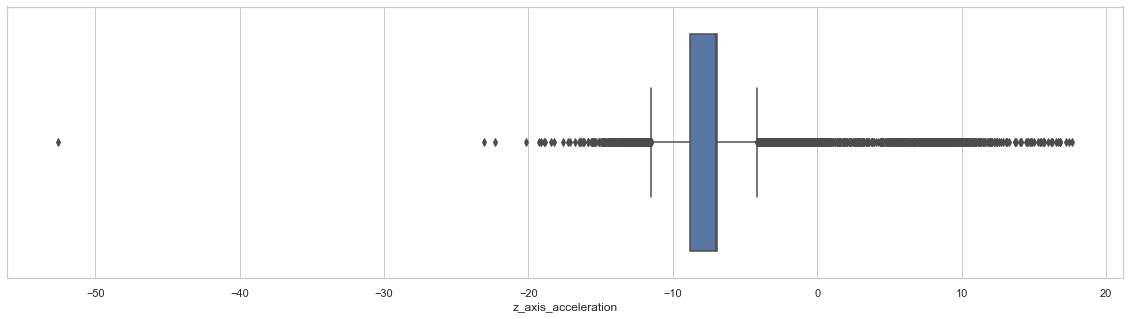

In [15]:
# Z - Axis Acceleration
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=final_df["z_axis_acceleration"]);

---

In [16]:
final_df['y_axis_acceleration'].describe()

count    17558.000000
mean         4.768668
std          3.089130
min        -15.885376
25%          2.823311
50%          6.632122
75%          6.675241
max         45.443670
Name: y_axis_acceleration, dtype: float64

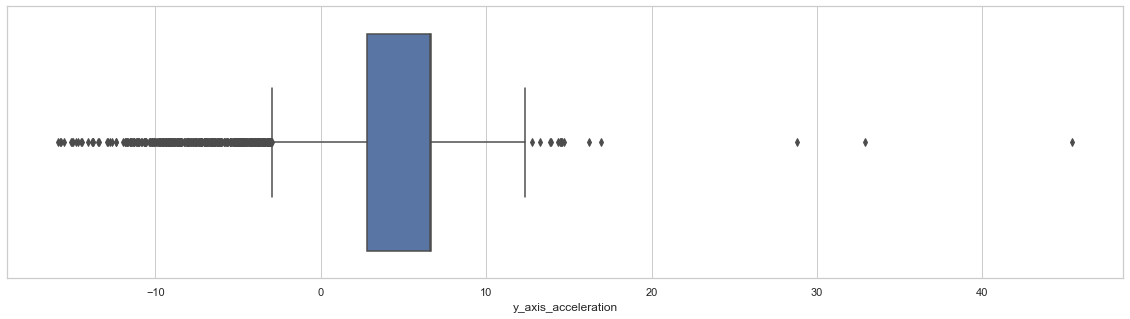

In [17]:
# Y - Axis Acceleration 
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=final_df["y_axis_acceleration"]);

---

In [18]:
final_df['speed'].describe()

count    17558.000000
mean         2.607702
std          4.767284
min          0.000176
25%          0.016159
50%          0.068818
75%          2.924328
max         19.095121
Name: speed, dtype: float64

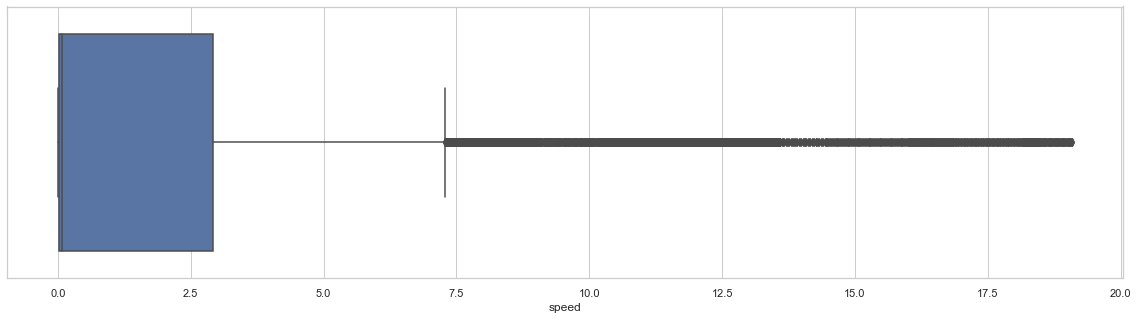

In [19]:
# Y - Axis Acceleration 
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=final_df["speed"]);

---

Box plots show high number of outliers

---

## Pothole

Z-axis accelerometer reading would **drop** sharply when a biker runs over a pothole. A z-score of more than 3

In [20]:
# summary of z scores of z-axis
pd.Series(stats.zscore(final_df['z_axis_acceleration'])).describe()

count    1.755800e+04
mean     1.936510e-15
std      1.000028e+00
min     -1.289609e+01
25%     -4.659867e-01
50%      2.727408e-02
75%      5.446953e-02
max      7.041028e+00
dtype: float64

In [21]:
# creating new column with z-scores
final_df['zscore_z_axis'] = pd.Series(stats.zscore(final_df['z_axis_acceleration']))

In [22]:
# initiating flag for pothole
final_df['pothole'] = 0

In [23]:
# how many records are there?
final_df.loc[final_df['zscore_z_axis'] <= -3, 'pothole'].shape[0]

10

In [24]:
# updating flag for pothole
final_df.loc[final_df['zscore_z_axis'] <= -3, 'pothole'] = 1

In [41]:
final_df.loc[final_df['pothole'] == 1, ['lat', 'long', 'timeStamp', 'pothole']]

,lat,long,timeStamp,pothole
11357,12.979334,77.602328,2020-03-04 05:14:01.058,1
11358,12.979334,77.602328,2020-03-04 05:14:01.070,1
11411,12.979334,77.602328,2020-03-04 05:14:01.657,1
11413,12.979334,77.602328,2020-03-04 05:14:01.677,1
13207,12.979311,77.602291,2020-03-04 05:14:21.175,1
13208,12.979311,77.602291,2020-03-04 05:14:21.186,1
15661,12.976757,77.602115,2020-03-04 05:14:47.781,1
15662,12.976757,77.602115,2020-03-04 05:14:47.792,1
15663,12.976756,77.602115,2020-03-04 05:14:47.803,1
15664,12.976756,77.602116,2020-03-04 05:14:47.815,1


----

## Speed Breaker

Z-axis accelerometer reading would **rise** sharply when a biker goes over a speedbreaker

In [26]:
# initiating flag for speed_breaker
final_df['speed_breaker'] = 0

In [27]:
# how many records are there?
final_df.loc[final_df['zscore_z_axis'] >= 3,].shape[0]

581

In [28]:
# updating flag for speed breakers
final_df.loc[final_df['zscore_z_axis'] >= 3, 'speed_breaker'] = 1

In [42]:
final_df.loc[final_df['speed_breaker'] == 1,['lat', 'long', 'timeStamp', 'speed_breaker']]

,lat,long,timeStamp,speed_breaker
0,12.979606,77.601591,2020-03-04 05:11:56.729,1
1,12.979606,77.601591,2020-03-04 05:11:56.772,1
2,12.979606,77.601591,2020-03-04 05:11:56.790,1
3,12.979606,77.601591,2020-03-04 05:11:56.820,1
4,12.979606,77.601591,2020-03-04 05:11:56.840,1
...,...,...,...,...
17553,12.917346,77.627528,2020-03-04 05:42:26.327,1
17554,12.917346,77.627528,2020-03-04 05:42:26.337,1
17555,12.917346,77.627528,2020-03-04 05:42:26.347,1
17556,12.917346,77.627528,2020-03-04 05:42:26.357,1


----

## Rash Acceleration
Rapid increase in Y-axis accelerometer reading would indicate a biker accelerating above normal

In [30]:
# creating new column with z-scores
final_df['zscore_y_axis'] = pd.Series(stats.zscore(final_df['y_axis_acceleration']))

In [31]:
# initiating flag for rash acceleration
final_df['rash_acceleration'] = 0

In [32]:
# summary of z scores of z-axis
pd.Series(stats.zscore(final_df['y_axis_acceleration'])).describe()

count    1.755800e+04
mean     1.190399e-14
std      1.000028e+00
min     -6.686229e+00
25%     -6.297603e-01
50%      6.032466e-01
75%      6.172052e-01
max      1.316751e+01
dtype: float64

In [33]:
# how many records are there?
final_df.loc[final_df['zscore_y_axis'] >= 3,].shape[0]

11

In [34]:
# updating flag for rash_acceleration
final_df.loc[final_df['zscore_y_axis'] >= 3, 'rash_acceleration'] = 1

In [44]:
final_df.loc[final_df['rash_acceleration'] == 1,['lat', 'long', 'timeStamp', 'rash_acceleration']]

,lat,long,timeStamp,rash_acceleration
356,12.979606,77.601591,2020-03-04 05:12:01.682,1
357,12.979606,77.601591,2020-03-04 05:12:01.730,1
358,12.979606,77.601591,2020-03-04 05:12:01.745,1
359,12.979606,77.601591,2020-03-04 05:12:01.755,1
360,12.979606,77.601591,2020-03-04 05:12:01.765,1
413,12.979606,77.601591,2020-03-04 05:12:02.476,1
11404,12.979334,77.602328,2020-03-04 05:14:01.584,1
11410,12.979334,77.602328,2020-03-04 05:14:01.647,1
11411,12.979334,77.602328,2020-03-04 05:14:01.657,1
11412,12.979334,77.602328,2020-03-04 05:14:01.667,1


---

## Hard Brakes
Sharp drop in Y-axis accelerometer reading would indicate a biker braking abnormally

In [36]:
# initiating flag for hard brakes
final_df['hard_brakes'] = 0

In [37]:
# summary of z scores of z-axis
pd.Series(stats.zscore(final_df['y_axis_acceleration'])).describe()

count    1.755800e+04
mean     1.190399e-14
std      1.000028e+00
min     -6.686229e+00
25%     -6.297603e-01
50%      6.032466e-01
75%      6.172052e-01
max      1.316751e+01
dtype: float64

In [38]:
# hard braking can be associated when bike is in good speed only - taking above average speed for hard brake
final_df.loc[(final_df['speed'] >= final_df['speed'].mean()) & (final_df['zscore_y_axis'] <= -3), 'hard_brakes'] = 1

In [45]:
final_df.loc[final_df['hard_brakes'] == 1,['lat', 'long', 'timeStamp', 'hard_brakes']]

,lat,long,timeStamp,hard_brakes
16920,12.93736,77.619421,2020-03-04 05:42:19.155,1


---

**Filters on each flag created can be used to identify Lat, Long and Time of each event**

---

# Possible next steps

1. Validate rule-based flags with data which has manually labelled readings by running experiments
3. Validated flags on riding patterns can then be used to build Machine Learning Models to classify each pattern
3. Study ongoing research on topic to understand proven ways to determine riding patterns

----